<a href="https://colab.research.google.com/github/ShreyasDominator/M-tech-Project-Demand-forecasting-/blob/main/Time_Series_Model_Building_pynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Necessary Libraries for model


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import matplotlib as pyplot
import tensorflow as tf
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from sklearn.preprocessing import MinMaxScaler
import warnings
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

# LSTM Model

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/M_tech Project/Dataset/salesweekly.csv')

size = int(len(df) - 50)
# Number of previous points to be consider for prediction ...
# Here, I am taking 5 previous points and 6th point will be the output for that 5 points ....
n_steps=5
# here we have only one feature i.e sales value of different medications type
# The dataset is Univariat .....
n_features = 1

In [ ]:

subplotindex = 0
numrows = 4
numcols = 2



warnings.filterwarnings("ignore")

r = ['M01AB', 'M01AE', 'N02BA', 'N02BE', 'N05B', 'N05C', 'R03', 'R06']
size = int(len(df)-50)  # Example value, adjust as needed

In [ ]:

def split_sequence(sequence, n_steps):
    X, y = [], []
    for i in range(len(sequence)):
        end_ix = i + n_steps
        if end_ix > len(sequence) - 1:
            break
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

Epoch 1/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 124ms/step - loss: 0.2232
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 76ms/step - loss: 0.1752
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 91ms/step - loss: 0.1077
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 0.0576
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - loss: 0.0211
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 99ms/step - loss: 0.0255
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 90ms/step - loss: 0.0194
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - loss: 0.0178
Epoch 9/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 79ms/step - loss: 0.0180
Epoch 10/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - loss: 0.0180
Epoch 1/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 105ms/step - loss: 0.2093
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.1105 
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0601
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0221
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0207
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 

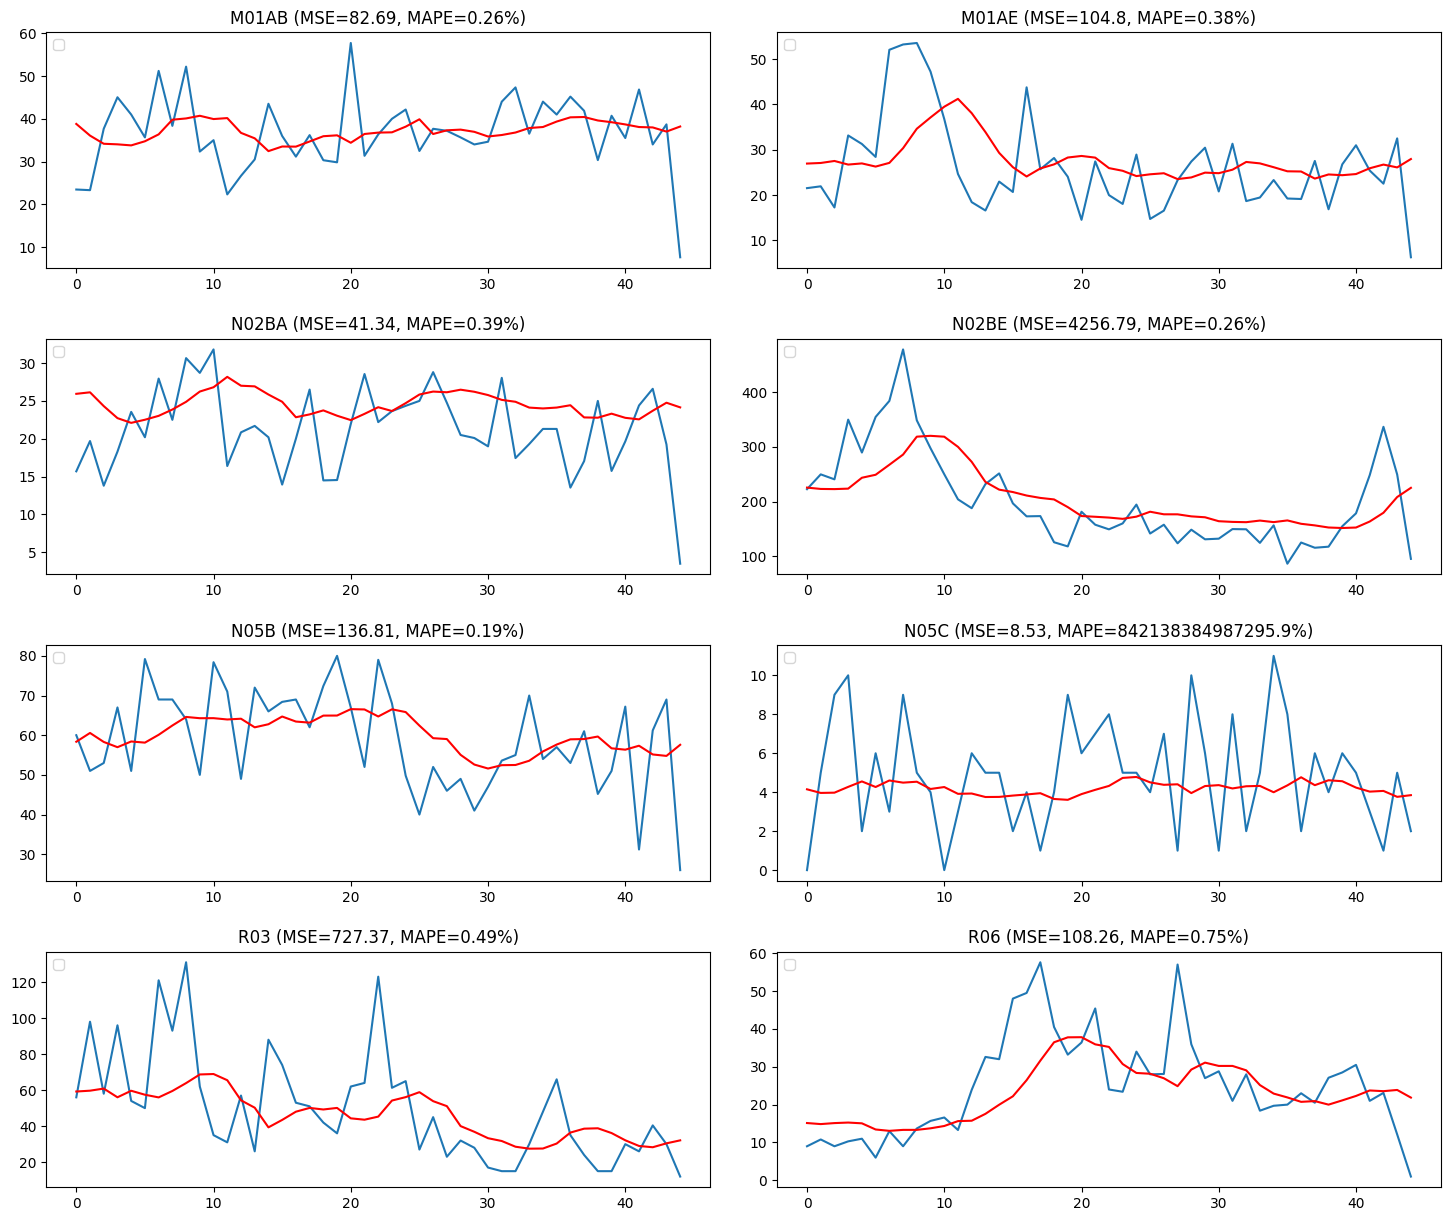

In [ ]:

subplotindex = 0
numrows = 4
numcols = 2
fig, ax = plt.subplots(numrows, numcols, figsize=(18, 15))
plt.subplots_adjust(wspace=0.1, hspace=0.3)

def split_sequence(sequence, n_steps):
    X, y = [], []
    for i in range(len(sequence)):
        end_ix = i + n_steps
        if end_ix > len(sequence) - 1:
            break
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

for x in r:
    rowindex = math.floor(subplotindex / numcols)
    colindex = subplotindex - (rowindex * numcols)
    X = df[x].values
    scaler = MinMaxScaler(feature_range=(0, 1))
    X = scaler.fit_transform(X.reshape(-1, 1))
    X_train, y_train = split_sequence(X[0:size], n_steps)
    X_test, y_test = split_sequence(X[size:len(df)], n_steps)
    X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], n_features))
    model = Sequential()
    model.add(LSTM(100, activation='relu', input_shape=(n_steps, n_features)))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')

    mape_per_epoch = []

    class MAPECallback(tf.keras.callbacks.Callback):
        def on_epoch_end(self, epoch, logs=None):
            predictions = self.model.predict(X_train, verbose=0)
            predictions = scaler.inverse_transform(predictions)
            y_train_inv = scaler.inverse_transform(y_train)
            perror = mean_absolute_percentage_error(y_train_inv, predictions)
            mape_per_epoch.append(perror)

    model.fit(X_train, y_train, epochs=10, verbose=1, callbacks=[MAPECallback()])
    X_test = X_test.reshape((len(X_test), n_steps, n_features))
    predictions = model.predict(X_test, verbose=0)
    y_test = scaler.inverse_transform(y_test)
    predictions = scaler.inverse_transform(predictions)
    error = mean_squared_error(y_test, predictions)
    perror = mean_absolute_percentage_error(y_test, predictions)
    ax[rowindex, colindex].set_title(x + ' (MSE=' + str(round(error, 2)) + ', MAPE=' + str(round(perror, 2)) + '%)')
    ax[rowindex, colindex].legend(['Real', 'Predicted'], loc='upper left')
    ax[rowindex, colindex].plot(y_test)
    ax[rowindex, colindex].plot(predictions, color='red')
    subplotindex = subplotindex + 1

plt.show()


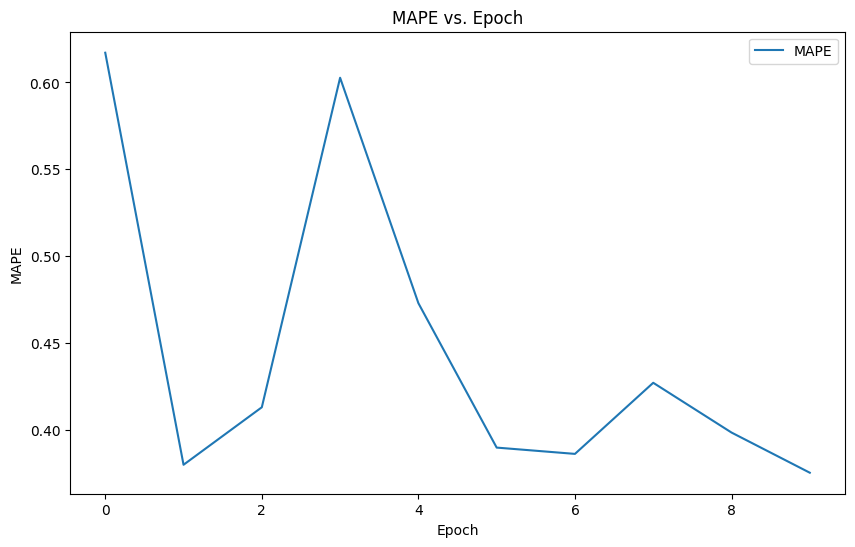

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(mape_per_epoch, label='MAPE')
plt.xlabel('Epoch')
plt.ylabel('MAPE')
plt.title('MAPE vs. Epoch')
plt.legend()
plt.show()


In [ ]:
model.summary()

Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_20 (LSTM)                       │ (None, 5, 100)              │          40,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_21 (LSTM)                       │ (None, 100)                 │          80,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 363,905 (1.39 MB)

 Trainable params: 121,301 (473.83 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 242,604 (947.68 KB)

# Stacked LSTM  


Epoch 1/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 93ms/step - loss: 0.2172
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.1158
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0317
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0320
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0207
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0207
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0178
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0174
Epoch 9/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0163
Epoch 10/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0174
Epoch 1/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 107ms/step - loss: 0.2012
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.1425
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0418
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0301
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0179
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s

KeyboardInterrupt: 

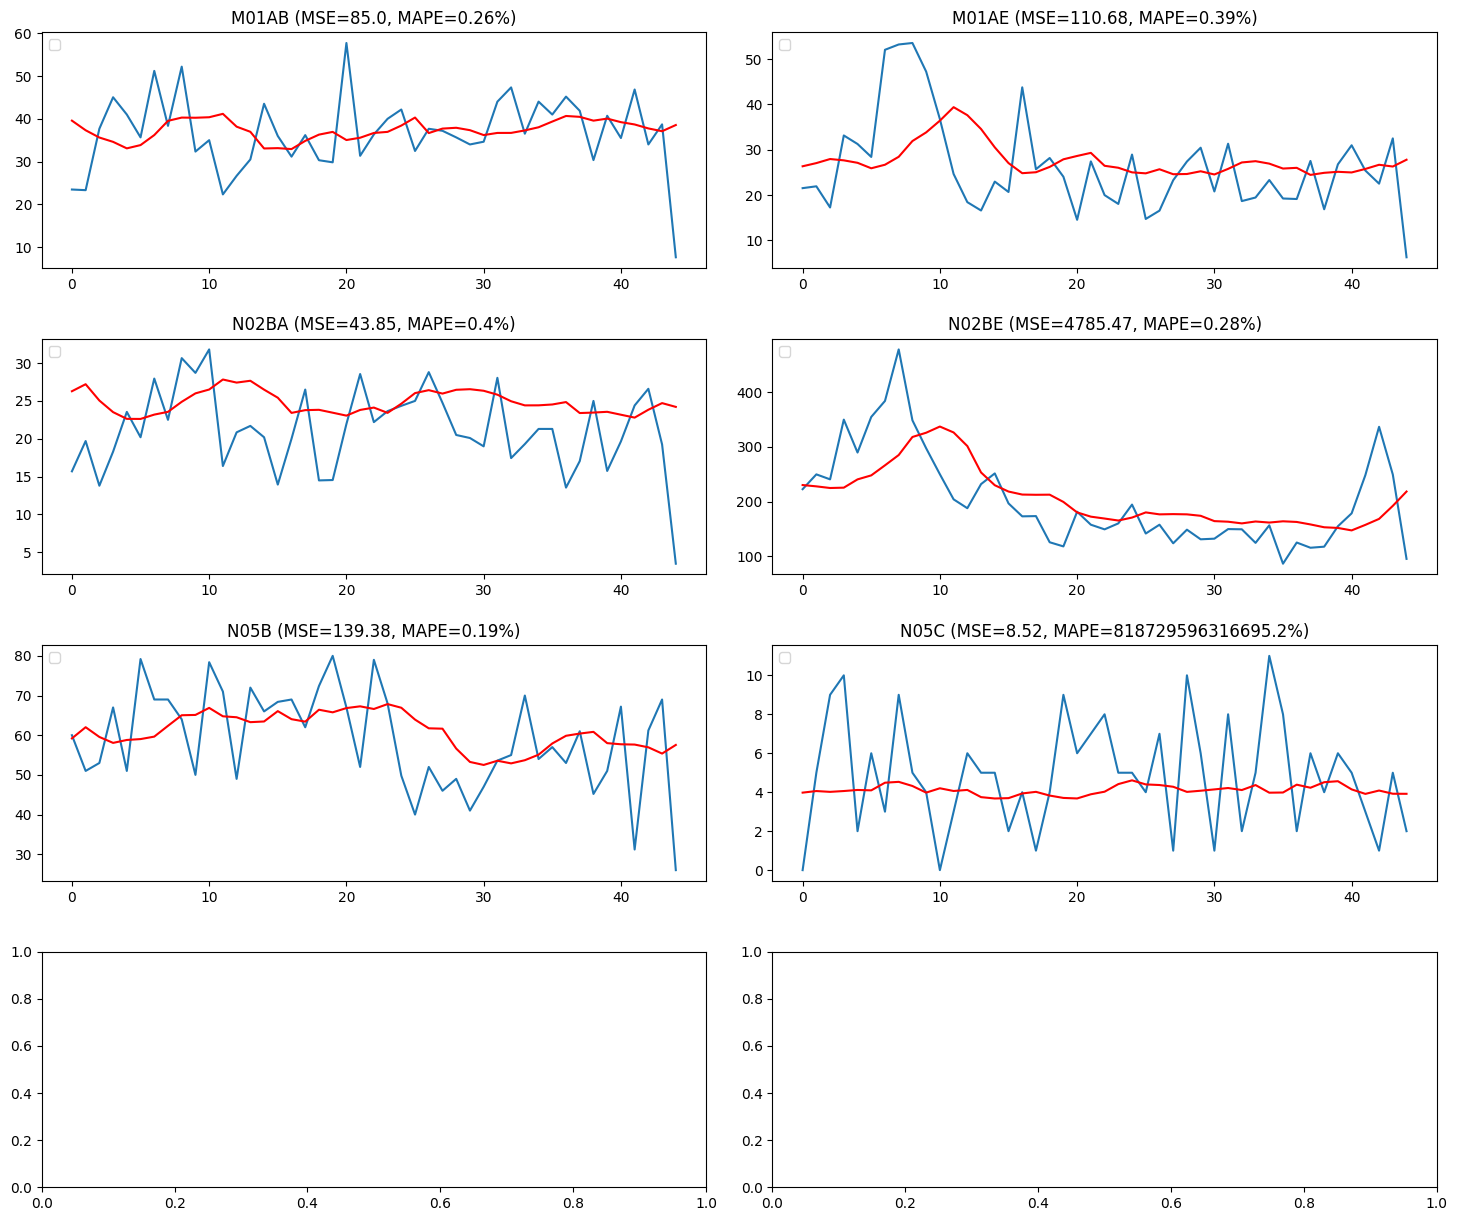

In [ ]:

subplotindex = 0
numrows = 4
numcols = 2
fig, ax = plt.subplots(numrows, numcols, figsize=(18, 15))
plt.subplots_adjust(wspace=0.1, hspace=0.3)

def split_sequence(sequence, n_steps):
    X, y = [], []
    for i in range(len(sequence)):
        end_ix = i + n_steps
        if end_ix > len(sequence) - 1:
            break
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

for x in r:
    rowindex = math.floor(subplotindex / numcols)
    colindex = subplotindex - (rowindex * numcols)
    X = df[x].values
    scaler = MinMaxScaler(feature_range=(0, 1))
    X = scaler.fit_transform(X.reshape(-1, 1))
    X_train, y_train = split_sequence(X[0:size], n_steps)
    X_test, y_test = split_sequence(X[size:len(df)], n_steps)
    X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], n_features))
    model = Sequential()
    model.add(LSTM(100, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
    model.add(LSTM(100, activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')

    mape_per_epoch = []

    class MAPECallback(tf.keras.callbacks.Callback):
        def on_epoch_end(self, epoch, logs=None):
            predictions = self.model.predict(X_train, verbose=0)
            predictions = scaler.inverse_transform(predictions)
            y_train_inv = scaler.inverse_transform(y_train)
            perror = mean_absolute_percentage_error(y_train_inv, predictions)
            mape_per_epoch.append(perror)

    model.fit(X_train, y_train, epochs=10, verbose=1, callbacks=[MAPECallback()])
    X_test = X_test.reshape((len(X_test), n_steps, n_features))
    predictions = model.predict(X_test, verbose=0)
    y_test = scaler.inverse_transform(y_test)
    predictions = scaler.inverse_transform(predictions)
    error = mean_squared_error(y_test, predictions)
    perror = mean_absolute_percentage_error(y_test, predictions)
    ax[rowindex, colindex].set_title(x + ' (MSE=' + str(round(error, 2)) + ', MAPE=' + str(round(perror, 2)) + '%)')
    ax[rowindex, colindex].legend(['Real', 'Predicted'], loc='upper left')
    ax[rowindex, colindex].plot(y_test)
    ax[rowindex, colindex].plot(predictions, color='red')
    subplotindex = subplotindex + 1

plt.show()


In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(mape_per_epoch, label='MAPE')
plt.xlabel('Epoch')
plt.ylabel('MAPE')
plt.title('MAPE vs. Epoch')
plt.legend()
plt.show()